# lesson 3 inclass code

## inclass priactice

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
x, y = data['data'], data['target']

In [4]:
x[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [5]:
y[1]

21.600000000000001

In [6]:
len(x[:, 0])

506

In [7]:
len(y)

506

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
def draw_rm_price():
    plt.scatter(x[:, 5 ], y)

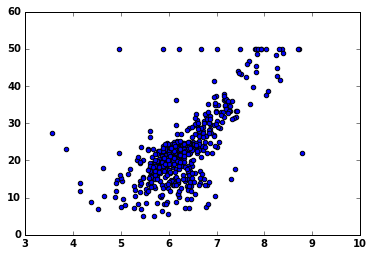

In [11]:
draw_rm_price()

In [12]:
import random

In [13]:
def price(rm, k, b):
    return k * rm + b

In [14]:
x_rm = x[:, 5]

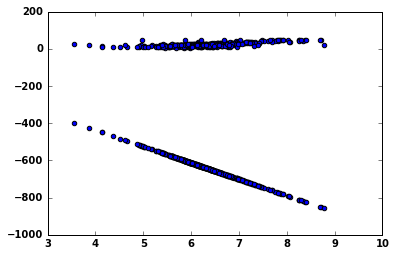

In [15]:
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random = [price(r, k, b) for r in x_rm]

draw_rm_price()
plt.scatter(x_rm, price_by_random)

# Loss

In [16]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [17]:
loss(y, price_by_random)

441055.90676357318

trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r, k,b) for r in x_rm]
    current_loss = loss(y, price_by_random)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('when time is {}, get best_k {}, best_b {}, and loss is {}'.format(i, best_k, best_b, min_loss))

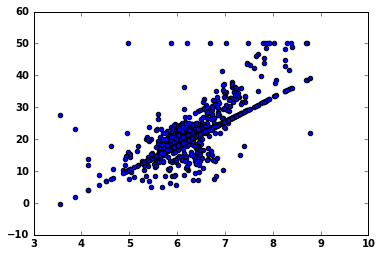

In [18]:
x_rm = x[:, 5]
k = 7.578729164176039
b = -27.464500325513242
price_by_random = [price(r,k,b) for r in x_rm]

draw_rm_price()
plt.scatter(x_rm, price_by_random)

2nd-method direction adjusting

trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 -100
best_b = random.random() * 200 -100
direction = [
    (+1, -1), (+1, +1), (-1, +1), (-1, -1)
]
next_direction = random.choice(direction)
scalar = 0.1 # learning rate
update_time = 0
for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k = best_k + scalar * k_direction
    current_b = best_b + scalar * b_direction
    price_by_k_b = [price(r, current_k, current_b) for r in x_rm]
    current_loss = loss(y, price_by_k_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0:
            print('when time is {}, get best_k {}, best_b {}, and the loss is {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)


# Dirivative 导数

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}}$$

In [19]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradiant = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradiant += (y_i - y_hat_i) * x_i
    return -2 / n * gradiant
    
def partial_b(x, y, y_hat):
    n = len(y)
    
    gradiant = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradiant += y_i - y_hat_i
        
    return -2 / n * gradiant

In [20]:
trying_times = 2000

x, y = data['data'], data['target']
min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
learning_rate = 1e-05

update_time = 0

for i in range(trying_times):
    price_by_k_b = [price(r, current_k,current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        if i % 50 == 0:
            print('when time is {}, get best_k {}, best_b {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
    k_gradiant = partial_k(x_rm, y, price_by_k_b)
    b_gradiant = partial_b(x_rm, y, price_by_k_b)
    current_k = current_k + (-1 * k_gradiant) * learning_rate
    current_b = current_b + (-1 * b_gradiant) * learning_rate
    

when time is 0, get best_k 1.2570372750090968, best_b -29.53480413052563, and the loss is 2024.6996272092042
when time is 50, get best_k 1.5329022420555554, best_b -29.491513338320672, and the loss is 1868.7905647332661
when time is 100, get best_k 1.7976875069034661, best_b -29.449964330551214, and the loss is 1725.154222015415
when time is 150, get best_k 2.0518380880965092, best_b -29.410087148046074, and the loss is 1592.824525250059
when time is 200, get best_k 2.2957811299157487, best_b -29.371814641558792, and the loss is 1470.9114472306007
when time is 250, get best_k 2.5299266203031294, best_b -29.335082358906405, and the loss is 1358.5950211761185
when time is 300, get best_k 2.754668079949408, best_b -29.299828436641295, and the loss is 1255.1198257727299
when time is 350, get best_k 2.9703832237047294, best_b -29.265993496074145, and the loss is 1159.789904336875
when time is 400, get best_k 3.1774345954235184, best_b -29.23352054347308, and the loss is 1071.9640839277224
w

# standard diviation as Loss function 

$$  Loss = \frac{1}{n} \sum{|{y_i - (kx_i + b_i)}|} $$

In [54]:
x_rm = x[:, 5]

In [52]:
len(x[:,5])

506

In [55]:
def sta_loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [56]:
def price(rm, k, b):
    return k * rm + b

choose k and b with supervising

 $$ \frac{\partial{loss}}{\partial{k}} = \{-x  (y > kx_i + b) and x  (y < kx_i + b)\}$$

$$ \frac{\partial{loss}}{\partial{b}} = \{-1  (y > kx_i + b) and 1 (y < kx_i + b)\}$$

In [57]:
def sta_partial_k(x, y, y_hat):
    n = len(list(y))
    gradiant = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i: gradiant += -x_i
        else:
            gradiant += x_i
    return gradiant / n

def sta_partial_b(x, y, y_hat):
    n = len(list(y))
    gradiant = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradiant += -1
        else:
            gradiant += 1
    return gradiant / n
            
    
    

In [66]:
try_times = 2000
x_rm = x[:,5]
y = data['target']

min_loss = float('inf')

current_k = random.random() * 200 - 100 
current_b = random.random() * 200 - 100
learning_rate = 1e-3
updat_time = 0

for i in range(try_times):
    price_by_kb = [price(r, current_k, current_b) for r in x_rm]
    current_loss = sta_loss(y, price_by_kb)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = current_k 
        best_b = current_b
        if i % 50 == 0:
            print('when try {} time, get the best_k {} best_b {}, and the minus loss is {}'.format(i, best_k, best_b, min_loss))
            
    k_gradiant = sta_partial_k(x_rm, y, price_by_kb)
    b_gradiant = sta_partial_b(x_rm, y, price_by_kb)
    current_k = current_k + (-1 * k_gradiant) * learning_rate
    current_b = current_b + (-1 * b_gradiant) * learning_rate
    
    

when try 0 time, get the best_k 31.717613792577964 best_b 36.57550307750586, and the minus loss is 213.37630307897365
when try 50 time, get the best_k 31.403382073210345 best_b 36.525503077505974, and the minus loss is 211.35147160983945
when try 100 time, get the best_k 31.089150353842726 best_b 36.47550307750609, and the minus loss is 209.32664014070505
when try 150 time, get the best_k 30.774918634475107 best_b 36.42550307750621, and the minus loss is 207.30180867157085
when try 200 time, get the best_k 30.460686915107487 best_b 36.37550307750632, and the minus loss is 205.2769772024364
when try 250 time, get the best_k 30.14645519573987 best_b 36.32550307750644, and the minus loss is 203.25214573330192
when try 300 time, get the best_k 29.83222347637225 best_b 36.275503077506556, and the minus loss is 201.22731426416792
when try 350 time, get the best_k 29.51799175700463 best_b 36.22550307750667, and the minus loss is 199.20248279503346
when try 400 time, get the best_k 29.20376003

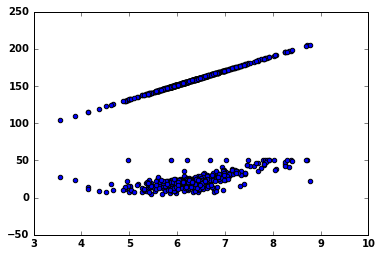

In [67]:
x_rm = x[:, 5]
k = 19.462576737240816
b = 34.6255030775104
price_by_random = [price(r,k,b) for r in x_rm]

draw_rm_price()
plt.scatter(x_rm, price_by_random)

# dynamic programming


In [21]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [22]:
from collections import defaultdict

In [23]:
price = defaultdict(int)

In [24]:

for i, p in enumerate(original_price):
    price[i+1] = p
    

In [25]:
price[11]

0

In [34]:
#@get_call_time
@memo
def r(n):
    #fname = r.__name__
    #call_time_with_arg[(fname, n)] +=1
    return max(
    [price[n]] + [r(i) + r(n -i) for i in range(1, n)]
    )

In [35]:
from functools import wraps

In [36]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    
    @wraps(f)
    def wrap(n):
        #print('I can count')
        result = f(n)
        call_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap


In [37]:
r(6)

17

In [38]:
r(15)

43

In [39]:
def memo(f):
    already_compoted = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in already_compoted:
            result = already_compoted[arg]
        else:
            result = f(arg)
            already_compoted[arg] = result
            
        return result
    return _wrap

In [43]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function:{} called once!'.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result
    

In [44]:
def some_function_1(): print('I am function 1')

In [45]:
def example(f, arg):
    return f(arg)
@get_call_time
def add_ten(num):
    return num+ 10

In [47]:
get_call_times(some_function_1)

I am function 1
function:some_function_1 called once!


In [48]:
called_time

defaultdict(int, {'some_function_1': 2})

In [49]:
from collections import Counter

In [50]:
Counter(call_time_with_arg).most_common()

NameError: name 'call_time_with_arg' is not defined

In [ ]:
call_time_with_arg = defaultdict(int)

In [ ]:
solution = {}

In [ ]:
@get_call_time
@memo
def r(n):
    #fname = r.__name__
    #call_time_with_arg[(fname, n)] +=1
    max_price, max_split = max(
    [(price[n], 0)] + [(r(i) + r(n -i), i) for i in range(1, n)], key=lambda x : x[0]
    )
    solution[n] = (n - max_split, max_split) 
    
    return max_price


In [ ]:
def memo(f):
    already_compoted = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in already_compoted:
            result = already_compoted[arg]
        else:
            result = f(arg)
            already_compoted[arg] = result
            
        return result
    return _wrap

In [ ]:
r(243)

In [ ]:
solution

In [ ]:
r(15)

In [ ]:
r(19)

In [ ]:
call_time_with_arg

In [ ]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return left_split
    return parse_solution(left_split) +parse_solution(right_split)

In [ ]:
parse_solution(243)